### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plot
import sklearn 

##### Version Check

In [3]:
assert np.__version__ == '1.21.6'
assert pd.__version__ == '1.3.5'
assert matplotlib.__version__ == '3.2.2'
assert sklearn.__version__ == '1.0.2'

### Importing / Prepping The Dataset<sup>1</sup>

In [4]:
data = pd.read_csv('data.csv')
cities = pd.read_csv('cities.csv')
street = pd.read_csv('street.csv')
zipcode = pd.read_csv('zipcode.csv')

##### Displaying The Dataset

In [5]:
# Prints The Keys and Their Data Types
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [6]:
# Describes The Data in a Table
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


##### Enumeration


In [7]:
# Enumerate Object Data Onto Ints
data = pd.merge(data, cities, on='city')
data = pd.merge(data, street, on='street')
data = pd.merge(data, zipcode, on='statezip')

# Drop The Related Columns
data = data.drop(columns=['city', 'street', 'statezip', 'country', 'date']) # country, date Dropped Due To Irrelevance

# Check For Correct Enumeration
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,cityid,streetid,zipcode
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,98133
1,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,98133
2,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,98133
3,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,98133
4,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,98133


In [8]:
# Check All Data Is Numbers
data.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
cityid             int64
streetid           int64
zipcode            int64
dtype: object

In [9]:
# Physical Assertion That All Data Is Numbers
for _ in data.dtypes:
  assert type(_) is 'float64' or 'int64'

##### Check Unusable Data

In [10]:
# Checking Amount of Null Values
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
cityid           0
streetid         0
zipcode          0
dtype: int64

Since we have no null values, we only need to check for unusable values, such as duplicates, or invalid values.

In [11]:
# Checking Amount of Duplicate Values
data.duplicated().sum()

362466

Since many of our values will have the same value (i.e. many houses will have two or three floors), we don't need to deal with duplicated values

In [12]:
# Print What Unusable Values We Have
no_check = ['waterfront', 'view', 'sqft_basement', 'cityid', 'streetid', 'yr_renovated']
# no_check are fields we don't need to check because they're values are
# confirmed usable or there is no value that doesn't make sense for them 
for _ in data:
  if _ in no_check: continue 
  subset = data.loc[data[_] <= 0]
  l = len(subset.index)
  if l > 0: print(f'{_}: {l}')

price: 3482
bedrooms: 121
bathrooms: 121


So what do these values mean?

`price` being `0`, `bedrooms` being `0`, and `bathrooms` being `0` is illogical because every house should cost money, and should have at least one bedroom or bathroom.

##### Dealing With Unusable Data

Currently, we have `3724` rows that include missing data (some rows could be counted for twice) 

In [13]:
# Percentages Of Missing Data
print(round((3724 / len(data.index)) * 100, 2))
print(round((3482 / 3724 * 100), 2))


1.01
93.5


Precisely, `1.01%` of our data has unusable values, however `93.50%` of that is missing price values. Our model aims to predict price, so missing price values does nothing to help with training our model directly (It can help with testing the model's effectiveness). Additionally, filling in a value (i.e. the mean, median, or mode) of the data will only reduce the accuracy of our AI. Therefore, it is reasonable to drop any row that has a missing price value.



In [14]:
# Collect And Drop Missing Data Rows
r_initial = len(data.index)
no_price = data.loc[data['price'] <= 0] # Save for later
data = data.drop(index=(data.loc[data['price'] <= 0]).index)
r_final = len(data.index)

# Assert Rows Dropped Equals Number Of Rows With No Price
assert (r_initial - r_final) == 3482
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,cityid,streetid,zipcode
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,98133
1,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,98133
2,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,98133
3,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,98133
4,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,98133


In [15]:
# Percent Of Non-Price Unusable Data
print(round(242 / len(data.index) * 100, 2))
print(round(242 / 3724 * 100, 2))

0.07
6.5


`6.5%` of the missing data is due to missing bathroom or bedroom data. 

This accounts for `.07%` of the **new** dataset (the dataset with the missing price rows dropped). 

Since this value is negligible, the best way to account for the missing data is by filling with the median, due to the skew of the data<sup>+</sup>. 

In [16]:
# Calculate The Medians
bed_median = data['bedrooms'].median()
bath_median = data['bathrooms'].median()

# Copy The Data (This Is Going To Be Used For Comparison Later)
comparison_copy = data 

# Replace With The Median
data['bedrooms'] = data['bedrooms'].replace(0, bed_median)
data['bathrooms'] = data['bathrooms'].replace(0, bath_median)

# Assert No More Missing Values
assert len((data.loc[data['bedrooms'] <= 0]).index) == 0
assert len((data.loc[data['bathrooms'] <= 0]).index) == 0 

### Displaying The Data

##### Important Displays

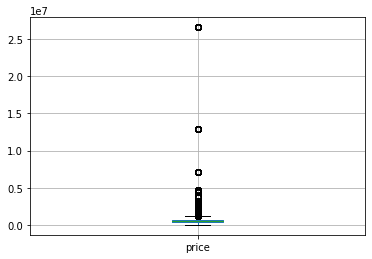

In [17]:
plt = data.boxplot(column=['price'])

Price is our target value. Our model is going to attempt to predict the price given other factors.

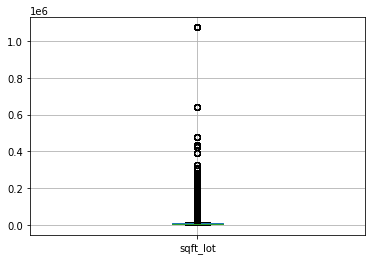

In [18]:
plt = data.boxplot(column=['sqft_lot'])

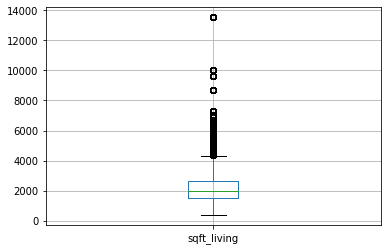

In [19]:
plt = data.boxplot(column=['sqft_living'])

These plots indicate a strong right skew with a lot of outliers along the right tail. This skew can be generalized to the rest of the data, and is logical since houses are less likely to be overly expensive, excessively large, etc. 

It is important to note that this generalization cannot apply to assigned integer values such as condition or view.

Discluding the outliers, the distribution of the data appears approximately symmetric.

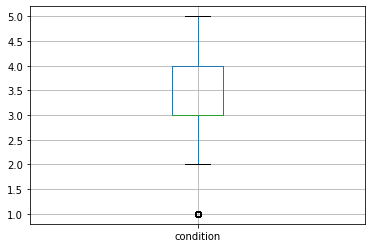

In [20]:
# Proof of Non-Generalization
plt = data.boxplot(column=['condition'])

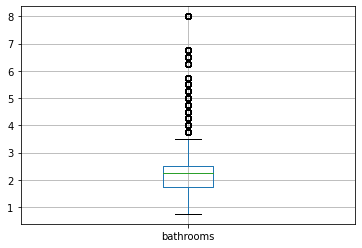

In [21]:
# Proof of Generalization
plt = data.boxplot(column=['bathrooms'])

##### Object-To-Int Displays

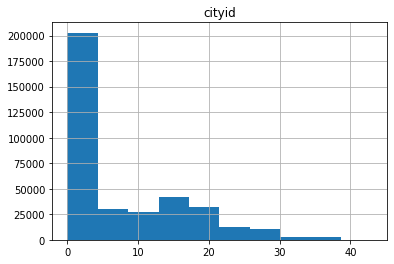

In [22]:
plt = data.hist(column=['cityid'])

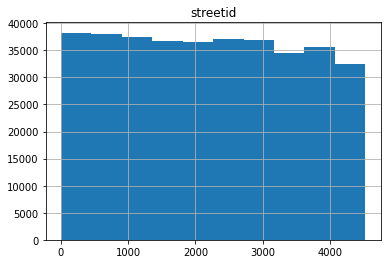

In [23]:
plt = data.hist(column=['streetid'])

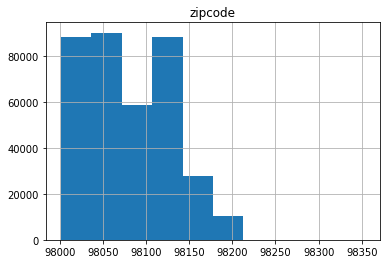

In [24]:
plt = data.hist(column=['zipcode'])

These histograms indicate that the majority of the data was collected in a similar location (i.e. close zip codes, same cities), and almost equal amounts of houses on each street were collected

##### Compare Bedroom / Bathroom Data

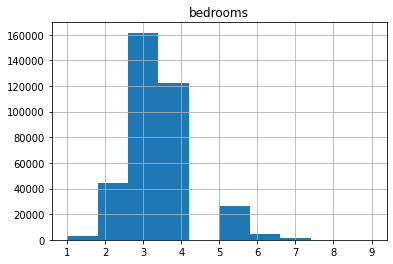

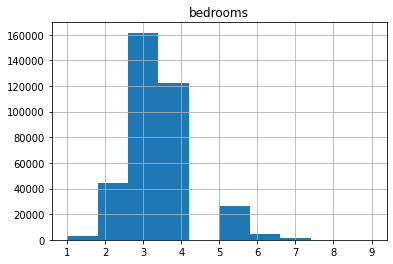

In [25]:
plt = data.hist(column=['bedrooms'])
plt = comparison_copy.hist(column=['bedrooms']) # comparison_copy Copied Earlier

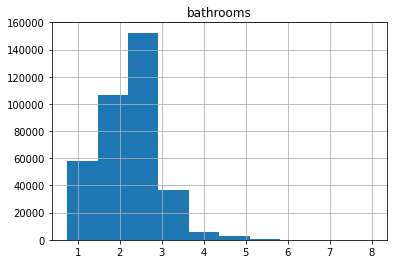

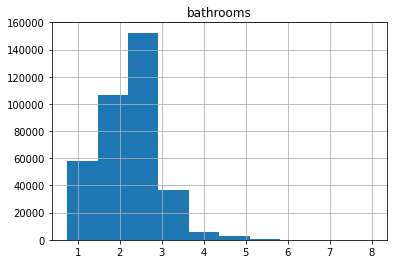

In [26]:
plt = data.hist(column=['bathrooms'])
plt = comparison_copy.hist(column=['bathrooms']) # comparison_copy Copied Earlier

As seen above, there is negligible difference between the edited and non-edited copies of the data. This makes sense since there were only `121` entries for both data columns with unusable values, so compared to the thousands of data entries, we shouldn't see a noticeable difference. 

In fact, we can place both histograms on top of each other

<BarContainer object of 10 artists>

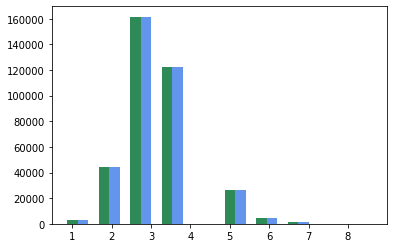

In [27]:
# Superimpose Histograms

import matplotlib.pyplot as plot 

# Get Amounts From Both Datasets
new_bedrooms = {}
copy_bedrooms = {}
for _ in data['bedrooms']:
  if _ in new_bedrooms.keys():
    new_bedrooms[_] += 1
  else:
    new_bedrooms[_] = 1
for _ in comparison_copy['bedrooms']:
  if _ in copy_bedrooms.keys():
    copy_bedrooms[_] += 1
  else:
    copy_bedrooms[_] = 1

# Get The Subplots
np.random.seed(0)
fig, ax = plot.subplots()

# Plot The Data
a_heights, a_bins = np.histogram(data['bedrooms'])
b_heights, b_bins = np.histogram(comparison_copy['bedrooms'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='seagreen')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='cornflowerblue')

As seen above, we can see that there is no discernable difference between the plots, therefore we can safely assume that the updated data won't have a significant impact on the reliability of the model. 

### Scaling The Data (Normalization) and Filtration

We want all the values to fall in between `0` and `1` (inclusive)<sup>++</sup>

In [28]:
# Define Target and Predictors
target = ['price']
predictors = list(set(list(data.columns))-set(target))
# Normalize Data
data[predictors] = data[predictors]/data[predictors].max()

In [29]:
# Show Normalized Data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,363584.0,563433.262210,520946.911264,7800.000000,345000.000000,482000.000000,664950.000000,26590000.0
bedrooms,363584.0,0.377796,0.099768,0.111111,0.333333,0.333333,0.444444,1.0
bathrooms,363584.0,0.270884,0.095691,0.093750,0.218750,0.281250,0.312500,1.0
sqft_living,363584.0,0.157719,0.069811,0.027326,0.108567,0.146233,0.192762,1.0
sqft_lot,363584.0,0.012338,0.029713,0.000594,0.004573,0.006957,0.009770,1.0
floors,363584.0,0.437229,0.158621,0.285714,0.285714,0.428571,0.571429,1.0
waterfront,363584.0,0.005482,0.073834,0.000000,0.000000,0.000000,0.000000,1.0
view,363584.0,0.053656,0.183933,0.000000,0.000000,0.000000,0.000000,1.0
condition,363584.0,0.690291,0.135399,0.200000,0.600000,0.600000,0.800000,1.0
sqft_above,363584.0,0.193774,0.090349,0.039320,0.126461,0.168969,0.245484,1.0


Next, we're going to check the variance threshold for the data.

In [30]:
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(data)
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

The `get_support` method returns a *Boolean* array where `True` represents that the data column does not have zero variance<sup>2</sup>. Since no columns have zero variance, our data has varying features which can be used to train our model.

Next, we will look at the Information Gain filtration method.

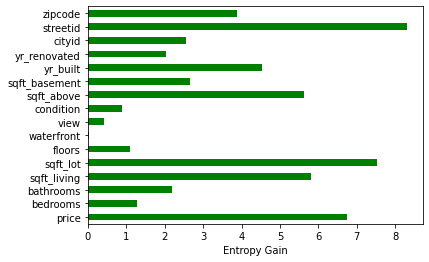

In [31]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plot

y = [_ for _ in range(1, len(data.index)+1, 1)] # indices for every data row
importances = mutual_info_regression(data, y)  # regression
feat_importances = pd.Series(importances, data.columns[0:len(data.columns)])
feat_importances.plot(kind='barh', color='green')
plot.xlabel('Entropy Gain')
plot.show()

This means that columns closer to `0` have less entropy (less total amount of microstates, i.e. less possible variability of values in the data), whereas columns larger have more entropy. These columns with less entropy are "less surprising" in terms of its effect on the data and the model<sup>3</sup>.

### Modeling

First, let's separate the data. Our goal is to predict the price, so that's our `target_feature`. Everything else will be used to help the model predict the price.

In [34]:
target_feature = ['price']
features = list(set(list(data.columns))-set(target_feature)) # Separate price data
X = data[features].values
y = data[target_feature].values
y = np.ravel(y) # fix format of price data

Now, let's import what we need to do this. We will be using the KNeighborsRegressor<sup>+++</sup> to model this data. We need a regression method because we're not classifying; we're predicted a numerical quantity. Due to the size and complexity of this data set, we cannot assume a linear model. Therefore, we cannot use `LinearRegression` from `sklearn`. In order to conserve time and RAM usage, KNeighborsRegressor was selected over RadiusNeighborsRegressor. 

In [35]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

On to building the model:

Mean Squared Error: 2017365.38
r^2 Value: 0.9999920383243036


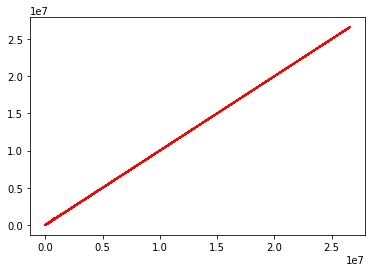

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=40)
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

print("Mean Squared Error: %.2f" % mean_squared_error(prediction, y_test))
print('r^2 Value: ' + str(r2_score(y_test, prediction)))
plot.plot(y_test, prediction, color='red')

Our r<sup>2</sup> is really close to 1, meaning that the model we trained does really well at predicting the actual price of the house (in a perfect model, r<sup>2</sup> would be 1). However, with this close of a perfect model, there is no need to improve the accuracy of the model, thus concluding our prediction model of house prices based on many factors.

### Sources, Acknowledgements, and More Reading

##### Sources & Acknowledgements

<sup>1</sup>Shree. (2018). House Price Prediction. Kaggle. https://www.kaggle.com/datasets/shree1992/housedata<br><br>
<sup>2</sup>Gupta, A. (2020, October 10). Feature Selection Techniques in Machine Learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/ <br><br>
<sup>3</sup>Brownlee, J. (2019, October 16). Information Gain and Mutual Information for Machine Learning. *Probability*. Machine Learning Mastery. https://machinelearningmastery.com/information-gain-and-mutual-information/<br><br>

Links to Packages Used: <br>
Pandas: https://pandas.pydata.org/docs/ <br>
Matplotlib: https://matplotlib.org <br>
Numpy: https://numpy.org <br>
Scikit-Learn: https://scikit-learn.org/stable/ <br>
Scikit-Feature-Chappers: https://pypi.org/project/skfeature-chappers/ <br>



##### More Reading

<sup>+</sup>More Reading on Imputation: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#How_to_decide_which_imputation_technique_to_use<br><br>
<sup>++</sup>More Reading on Normalization: https://deepchecks.com/glossary/normalization-in-machine-learning/ <br><br>

<sup>+++</sup>More Reading on (K) Nearest Neighbors Regression: https://scikit-learn.org/stable/modules/neighbors.html#regression and https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html



<sub>This model was created by Neil G. and Daniel D.</sub>